# Logistic Regression Project 

This notebook will use a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. The goal is to create a model that will predict whether or not someone will click on an ad based off the features of that user.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import Data

In [4]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0



This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


According to <code>.info()</code> the dataset does not contain any null values.

### Exploratory Data Analysis

See Fig. 1 for the barchart with the Age column. According to this chart, most users are between the age of 25 and 45.

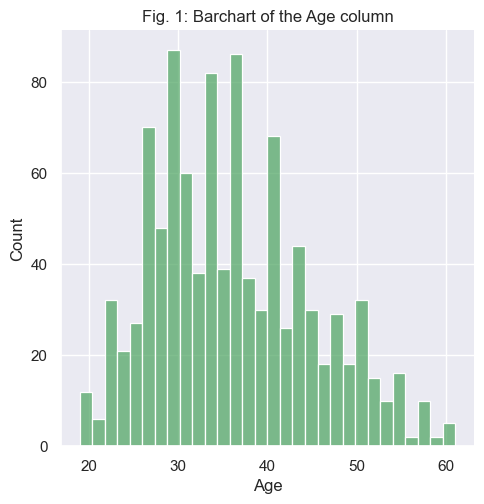

In [19]:
sns.set(color_codes=True)
sns.displot(df['Age'], kde=False, bins=30, color='g').set(title='Fig. 1: Barchart of the Age column')

See Fig. 2 for a jointplot showing Area Income versus Age. 

Text(0.5, 0.98, 'Fig. 2: Jointplot of the Area Income vs. Age column')

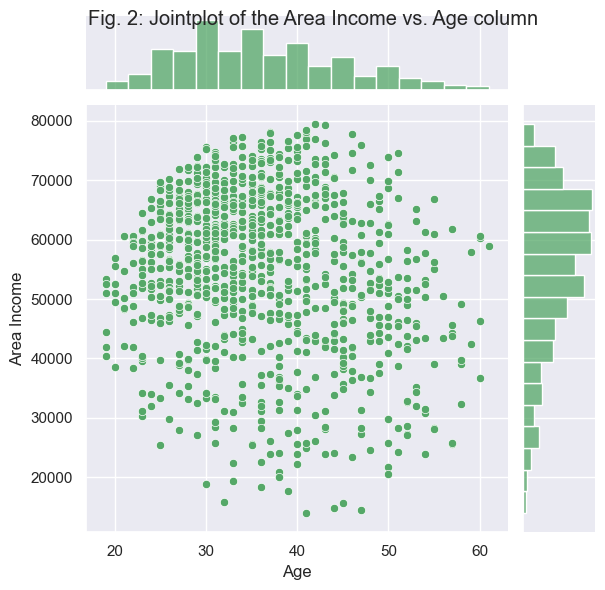

In [23]:
p = sns.jointplot(data=df, x='Age', y='Area Income', color='g') #.set(title='Fig. 2: Jointplot of the Area Income vs. Age column')
p.fig.suptitle('Fig. 2: Jointplot of the Area Income vs. Age column')

According to the jointplot in Fig. 2 there is no clear indication of a correlation between Area Income and Age.

See Fig. 3 for a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

Text(0.5, 0.98, 'Fig. 3: Jointplot of the Daily Time Spent on Site vs. Age column')

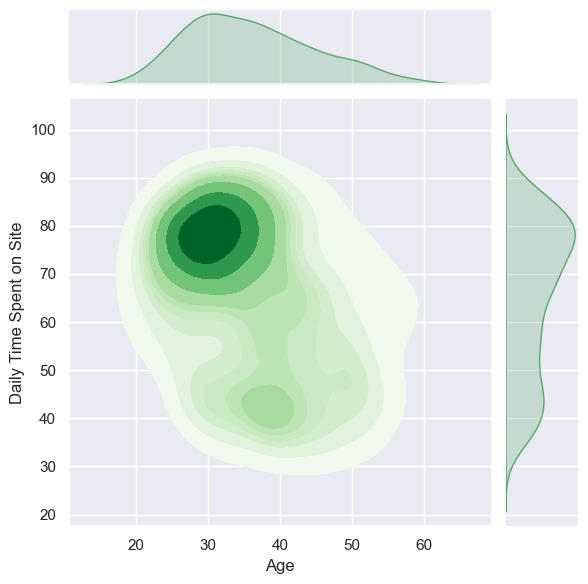

In [28]:
sns.jointplot(data=df, x="Age", y="Daily Time Spent on Site", kind="kde",cmap="Greens", color='g', fill=True)
p.fig.suptitle('Fig. 3: Jointplot of the Daily Time Spent on Site vs. Age column')

According to Fig. 3, people aged between 20 and 30 spend the most time on the website. These seems to be a 
negative correlation would mean that as one variable increases (in this case the Age), the second variable decreases (Daily Time Spent on Site). Negative correlation corresponds to points that move down as you go from left to right on your scatter plot.

See Fig. 4 for a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

Text(0.5, 0.98, 'Fig. 4: Daily Time Spent on Site vs. Daily Internet Usage')

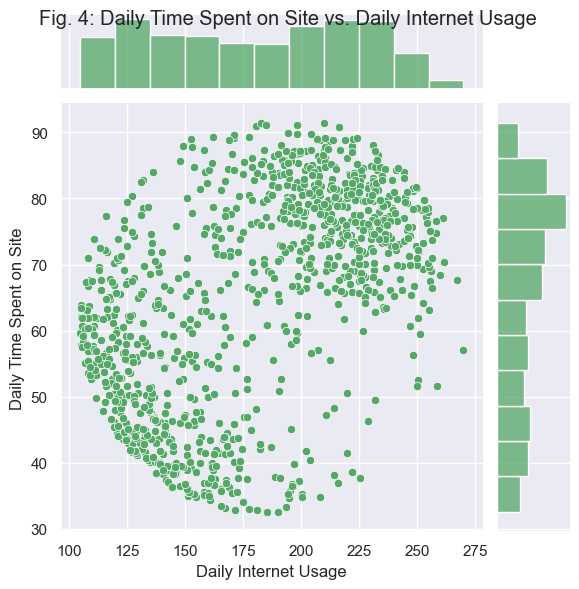

In [29]:
p = sns.jointplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', color='g')
p.fig.suptitle('Fig. 4: Daily Time Spent on Site vs. Daily Internet Usage')